['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]
    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619    

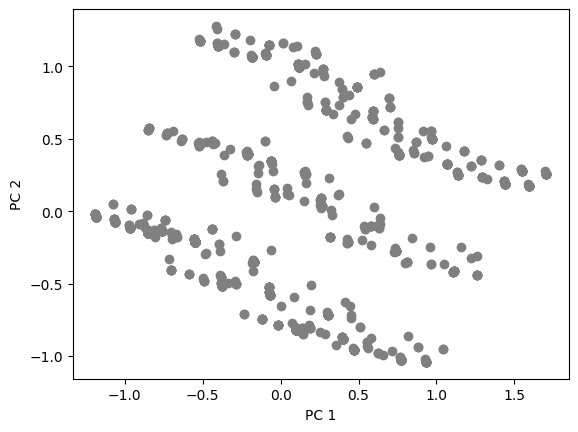

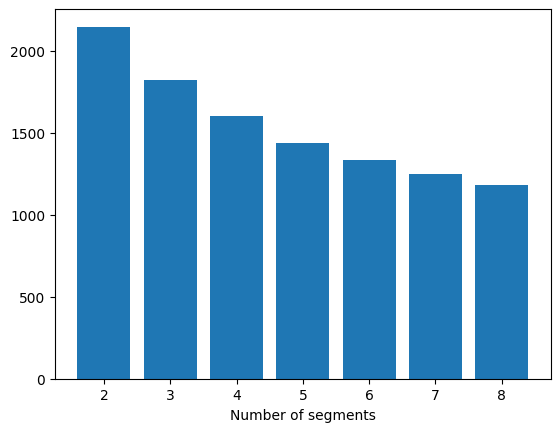

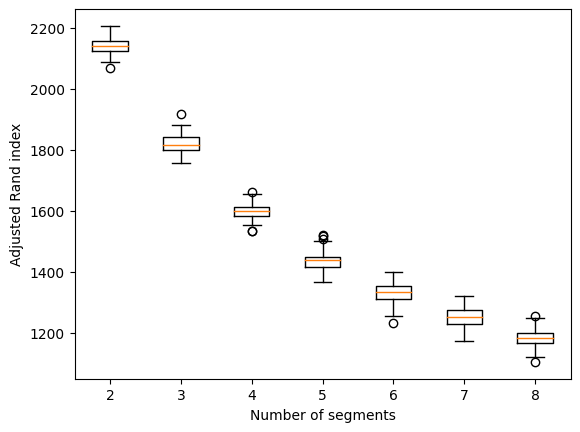

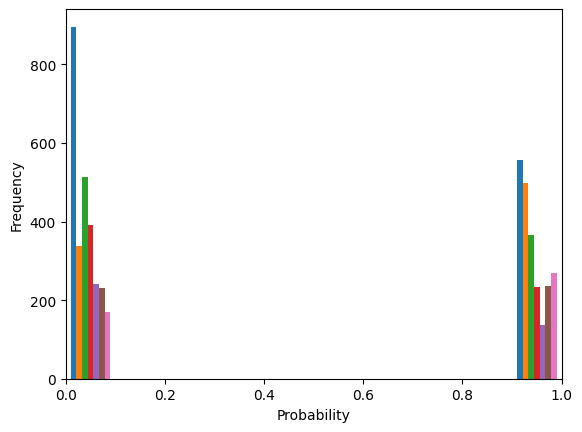

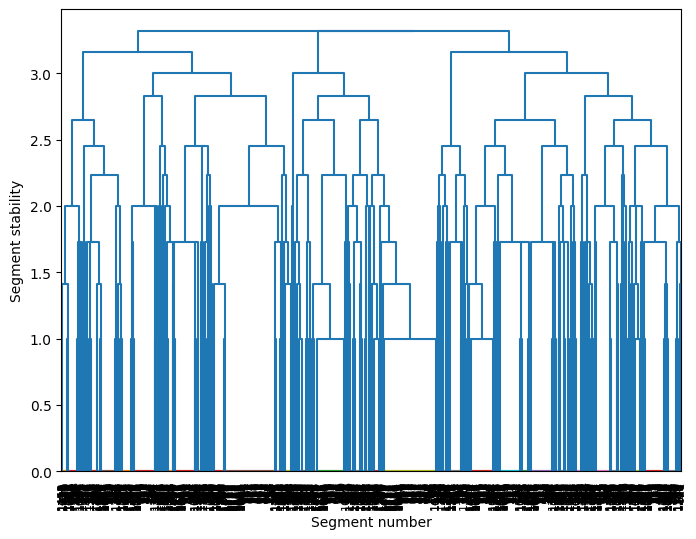

Model 2:
GaussianMixture(n_components=2)
Model 3:
GaussianMixture(n_components=3)
Model 4:
GaussianMixture(n_components=4)
Model 5:
GaussianMixture(n_components=5)
Model 6:
GaussianMixture(n_components=6)
Model 7:
GaussianMixture(n_components=7)
Model 8:
GaussianMixture(n_components=8)


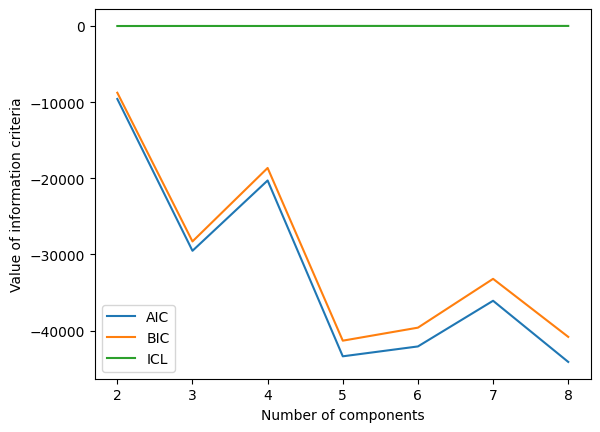

Mixture    0    1    2    3
K-means                    
0         10  207  296    0
1        235    0    7  124
2         58    0    5  179
3         38   64  224    6
Mixture    0    1    2    3
K-means                    
0          0  471    0   42
1          8   98  253    7
2        213    0   24    5
3         33   52    0  247
Log-Likelihood (Mixture Model with Fixed Clusters): 9.456781748071887
Log-Likelihood (Fitted Mixture Model): 7.192851078277508
Reversed Like Table:
+1              152
+2              187
+3              229
+4              160
-1               58
-2               59
-3               73
-4               71
0               169
I hate it!-5    152
I love it!+5    143
Name: Like, dtype: int64


In [17]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import statsmodels.api as sm
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings("ignore")


data=pd.read_csv('mcdonalds.csv')
col=data.columns.tolist()
print(col)

dim= data.shape
print(dim)

head_data= data.head(3)
print(head_data)

MD_x= data.iloc[:, 0:11].values
MD_x= (MD_x == "Yes").astype(int)
column_means= np.round(np.mean(MD_x, axis=0), 2)
print(column_means)

# Assuming MD_x is a pandas DataFrame containing your data

# Instantiate the PCA object
MD_pca = PCA()

# Perform PCA on MD.x
MD_pca.fit(MD_x)


# Get the summary
summary = pd.DataFrame({
    'Standard deviation': MD_pca.explained_variance_ ** 0.5,
    'Proportion of Variance': MD_pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)
})
print(summary)
summary=summary.round(1)

plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c='grey')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

# Perform K-means clustering
k_values = range(2, 9)
results = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    results.append(kmeans)

# Plot number of segments vs. within-cluster sum of squares
plt.bar(k_values, [res.inertia_ for res in results])
plt.xlabel("Number of segments")
plt.show()

# Perform bootstrapped K-means clustering
bootstrap_results = []
for k in k_values:
    bootstrap_scores = []
    for _ in range(100):
        bootstrap_sample = np.random.choice(range(MD_x.shape[0]), size=MD_x.shape[0], replace=True)
        bootstrap_data = MD_x[bootstrap_sample]
        kmeans = KMeans(n_clusters=k, random_state=1234)
        kmeans.fit(bootstrap_data)
        bootstrap_scores.append(kmeans.inertia_)
    bootstrap_results.append(bootstrap_scores)

# Plot number of segments vs adjusted Rand index
plt.boxplot(bootstrap_results)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand index")
plt.xticks(range(1, len(k_values) + 1), k_values)
plt.show()

# Assuming MD.x is the input data matrix and MD.k4 is the cluster labels
# Assuming MD.km28 is the KMeans clustering result

# Plot histogram of cluster membership probabilities
plt.hist([res.labels_ for res in results], bins=10, range=(0, 1))
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.xlim(0, 1)
plt.show()

# Extract the cluster labels for the desired segment
MD_k4 = [res.labels_ for res in results]

# Calculate segment stability
# Assuming x is the input data matrix and MD_k4 is the cluster labels

# Fit K-means clustering with the desired number of segments
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)

# Calculate silhouette scores for each data point
silhouette_vals = silhouette_samples(MD_x, kmeans.labels_)

# Sort the silhouette scores and extract the average silhouette score for each segment
segment_stability = []
for cluster in range(k):
    cluster_silhouette_vals = silhouette_vals[MD_k4 == cluster]
    segment_stability.append(cluster_silhouette_vals.mean())


# Perform clustering stability analysis
MD_k4 = results[2]
MD_r4 = linkage(MD_x, method='complete')
plt.figure(figsize=(8, 6))
dendrogram(MD_r4, color_threshold=1, leaf_font_size=8, labels=None)
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.show()

# Assuming MD.x is the input data matrix

# Fit Gaussian mixture models for different number of components (2 to 8)
k_values = range(2, 9)
models = []
for k in k_values:
    model = GaussianMixture(n_components=k)
    model.fit(MD_x)
    models.append(model)

# Print the fitted mixture models
for i, model in enumerate(models):
    print(f"Model {i+2}:")
    print(model)

# Plot information criteria
AIC = [model.aic(MD_x) for model in models]
BIC = [model.bic(MD_x) for model in models]
ICL = [model.lower_bound_ for model in models]
plt.plot(k_values, AIC, label="AIC")
plt.plot(k_values, BIC, label="BIC")
plt.plot(k_values, ICL, label="ICL")
plt.ylabel("Value of information criteria")
plt.xlabel("Number of components")
plt.legend()
plt.show()

# Extract the model with the desired number of components
desired_k = 4
desired_model = models[desired_k - 2]

# Obtain the cluster assignments from the desired model
MD_m4_clusters = desired_model.predict(MD_x)

# Compare cluster assignments from K-means and Gaussian mixture model
kmeans = KMeans(n_clusters=desired_k, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)
table = pd.crosstab(kmeans_clusters, MD_m4_clusters, rownames=["K-means"], colnames=["Mixture"])
print(table)

# Fit a Gaussian mixture model with fixed cluster assignments
MD_m4a = GaussianMixture(n_components=desired_k)
MD_m4a.fit(MD_x, MD_m4_clusters)

# Compare cluster assignments from K-means and the fitted Gaussian mixture model
MD_m4a_clusters = MD_m4a.predict(MD_x)
table = pd.crosstab(kmeans_clusters, MD_m4a_clusters, rownames=["K-means"], colnames=["Mixture"])
print(table)

# Calculate log-likelihoods of the fitted Gaussian mixture models
loglik_m4a = MD_m4a.score(MD_x)
loglik_m4 = desired_model.score(MD_x)
print(f"Log-Likelihood (Mixture Model with Fixed Clusters): {loglik_m4a}")
print(f"Log-Likelihood (Fitted Mixture Model): {loglik_m4}")


np.random.seed(1234)

# Reverse the levels of the 'Like' variable
like_table = data['Like'].value_counts().sort_index(ascending=False)
reversed_like_table = like_table.iloc[::-1]
print("Reversed Like Table:")
print(reversed_like_table)